In [7]:
import json
import pandas as pd
import seaborn as sns
from dataclasses import make_dataclass

In [2]:
def load_results(path):
    with open(path,'r') as f:
        results = json.load(f)
    return results

def get_accuracy(results):
    return results['accuracy']

In [10]:
paths_to_results = {
    'kde': '/home/andrew/Documents/study/thesis/thesis-src/output/localisation-results-k60-m5-s0025.json',
    'nn': '/home/andrew/Documents/study/thesis/thesis-src/output/localisation-results-1nn.json',
    'avg': '/home/andrew/Documents/study/thesis/thesis-src/output/localisation-results-avg-k2.json',
    'w_avg': '/home/andrew/Documents/study/thesis/thesis-src/output/localisation-results-wavg-k2-m15.json'
}

accuracy_by_methods = {}
for method, path in paths_to_results.items():
    accuracy_by_methods[method] = get_accuracy(load_results(path))

In [15]:
Record = make_dataclass('Record', ['method', 'threshold', 'accuracy'])

records = []
for method, acc_dict in accuracy_by_methods.items():
    for threshold, acc in acc_dict.items():
        records.append(Record(method, threshold, acc))
        
df = pd.DataFrame(records)
df=df[~df.threshold.isin(['1m', '5m'])]

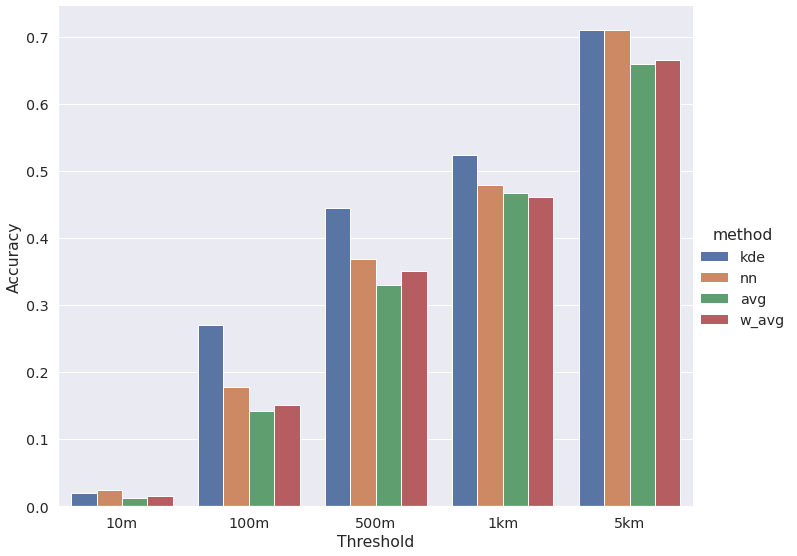

In [22]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
g=sns.catplot(data=df, hue='method', y='accuracy', x='threshold', kind='bar', height=8, aspect=10/8)
g.set_axis_labels(y_var='Accuracy', x_var="Threshold")
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/comparison_of_loc_methods.eps', format='eps',bbox_inches='tight')

In [17]:
df.pivot(index='threshold', columns='method', values='accuracy')

method,avg,kde,nn,w_avg
threshold,,,,
100m,0.142238,0.269731,0.178231,0.150911
10m,0.013010,0.019514,0.024284,0.015611
1km,0.467910,0.523417,0.479185,0.460538
500m,0.330009,0.444493,0.368170,0.350824
5km,0.659584,0.709887,0.709887,0.666088
